<a href="https://colab.research.google.com/github/saivarshittha/ML/blob/master/NLP/sentiment_analysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using NLTK

In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
all_pos_tweets = twitter_samples.strings('/root/nltk_data/corpora/twitter_samples/positive_tweets.json')
all_neg_tweets =  twitter_samples.strings('/root/nltk_data/corpora/twitter_samples/negative_tweets.json')

In [ ]:
len(all_pos_tweets)

5000

In [ ]:
type(all_neg_tweets)

list

In [ ]:
type(all_neg_tweets[0])

str

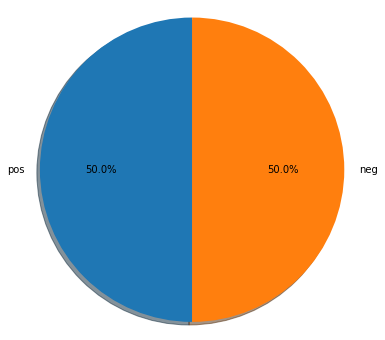

In [ ]:
fig = plt.figure(figsize=(6,6))
labels = 'pos','neg'
sizes = [len(all_pos_tweets),len(all_neg_tweets)]
plt.pie(sizes,labels=labels,autopct = '%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
all_pos_tweets[3]

'@97sides CONGRATS :)'

In [ ]:
all_neg_tweets[99]

'Good bye Party era :('

In [ ]:
tweet = all_pos_tweets[2222]
print(tweet)

😂😂thank you! :D https://t.co/V6aV6doasy


## Removing hyperlinks,twitter marks and styles

In [ ]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

In [ ]:
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)

In [ ]:
tweet2

'😂😂thank you! :D '

In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
tweet2

'😂😂thank you! :D '

In [ ]:
print('\033[92m' + tweet2)

😂😂thank you! :D 


In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['😂', '😂', 'thank', 'you', '!', ':D']


In [ ]:
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['😂', '😂', 'thank', ':D']


In [ ]:


# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

stemmed words:
['😂', '😂', 'thank', ':D']
